# Post analysis based on collocated data files (.nc) in output directory

In [1]:
import pyaerocom as pya
import os
from IPython.display import display, Math
import pandas as pd
import ANALYSIS_SCRIPT as analysis
import helpers
pya.change_verbosity('critical')

2018-09-19 13:16:01,370:WARNING:
basemap extension library is not installed (or cannot be imported. Some features will not be available


Elapsed time init all variables: 0.034067630767822266 s


2018-09-19 13:16:02,383:WARNING:
geopy library is not available. Aeolus data read not enabled


Elapsed time init pyaerocom: 1.4745573997497559 s


In [2]:
RELOAD_RESULTS = 1

Check for updates in file containing models.

### Define models, obsnetworks, years, and variables

In [3]:
OUT_DIR = analysis.OUT_DIR

YEARS = analysis.YEARS

# List of models considered
MODEL_LIST = analysis.all_model_ids()
print('List of models:\n{}'.format(MODEL_LIST))

# List of gridded OBS networks
OBS_NETWORKS = [k for k in analysis.OBS_INFO.keys()]
print('\nList of gridded obs networks:\n{}'.format(OBS_NETWORKS))

# Get unique variables
VARS = helpers.get_all_vars(analysis.OBS_INFO)
print('\nList of variables (unique):\n{}'.format(VARS))

RESULT_TABLE_TEMP = os.path.join(OUT_DIR, 'result_table.csv')
if not os.path.exists(RESULT_TABLE_TEMP):
    RELOAD_RESULTS = True

List of models:
['INCA-BCext_CTRL2016-PD', 'GEOS5-freegcm_CTRL2016-PD', 'GEOS-Chem-v11-01_AP3-CTRL2016-PD', 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 'INCA-BCin_CTRL2016-PD', 'SPRINTARS-T213_AP3-CTRL2016-PD', 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD', 'ECHAM6-SALSA_CTRL2016-PD', 'CNRM-AESM2_AP3-CTRL2016-PD', 'ECHAM6-HAM2_AP3-CTRL2016-PD', 'SPRINTARS-T106_AP3-CTRL2016-PD', 'GEOS5-replay_CTRL2016-PD', 'HadGEM3-GA7.1_AP3-CTRL2016-PD', 'CNRM-AESM2Nud_AP3-CTRL2016-PD', 'INCA_CTRL2016-PD', 'GEOS5-assimilate_CTRL2016-PD', 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD', 'CAM5.3-Oslo_AP3-CTRL2016-PD']

List of gridded obs networks:
['EBASMC']

List of variables (unique):
['absc550aer', 'scatc550aer']


### Import model information 

In the following block, all available models are initiated and information is provided about the data coverage of each model.

In [4]:
if RELOAD_RESULTS:
    all_models = pya.io.ReadGriddedMulti(MODEL_LIST)
    print(all_models)


Pyaerocom ReadGriddedMulti
--------------------------
Model IDs: ['INCA-BCext_CTRL2016-PD', 'GEOS5-freegcm_CTRL2016-PD', 'GEOS-Chem-v11-01_AP3-CTRL2016-PD', 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 'INCA-BCin_CTRL2016-PD', 'SPRINTARS-T213_AP3-CTRL2016-PD', 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD', 'ECHAM6-SALSA_CTRL2016-PD', 'CNRM-AESM2_AP3-CTRL2016-PD', 'ECHAM6-HAM2_AP3-CTRL2016-PD', 'SPRINTARS-T106_AP3-CTRL2016-PD', 'GEOS5-replay_CTRL2016-PD', 'HadGEM3-GA7.1_AP3-CTRL2016-PD', 'CNRM-AESM2Nud_AP3-CTRL2016-PD', 'INCA_CTRL2016-PD', 'GEOS5-assimilate_CTRL2016-PD', 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD', 'CAM5.3-Oslo_AP3-CTRL2016-PD']

Loaded data:

Pyaerocom ReadGridded
---------------------
Model ID: INCA-BCext_CTRL2016-PD
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/INCA-BCext_CTRL2016-PD/renamed
Available variables: ['abs550aer', 'cll', 'clt', 'deltaz3d', 'depbc', 'depdust', 'depno3', 'depoa', 'depso4', 'depss', 'emibc', 'emidms

In [13]:
data = all_models['ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD'].read_var('od532aer3d')

In [14]:
data.c

pyaerocom.GriddedData
Grid data: <iris 'Cube' of optical_thickness_of_atmosphere_layer_due_to_ambient_aerosol_particles / (1) (time: 2920; atmosphere_hybrid_sigma_pressure_coordinate: 60; latitude: 256; longitude: 512)>

## Results

This section contains results from the analysis that can be performed using the script ``EVAL_SCRIPT.py``. The following lines read all result CSV files that are stored in the result folder, imports them and extracts **Bias (nmb), RMS and Pearson R coefficient)** as one multiindex dataframe.

In [5]:
result_files = helpers.get_file_list(OUT_DIR, MODEL_LIST)

Importing 40 result files from model INCA-BCin_CTRL2016-PD
Importing 12 result files from model GEOS5-assimilate_CTRL2016-PD
Importing 48 result files from model SPRINTARS-T213_AP3-CTRL2016-PD
Importing 36 result files from model INCA-BCext_CTRL2016-PD
Importing 16 result files from model INCA_CTRL2016-PD
Importing 12 result files from model CNRM-AESM2_AP3-CTRL2016-PD
Importing 12 result files from model GEOS5-freegcm_CTRL2016-PD
Importing 40 result files from model ECHAM6.3-HAM2.3_AP3-CTRL2016-PD
Importing 8 result files from model SPRINTARS-T106_AP3-CTRL2016-PD
Importing 56 result files from model ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD
Importing 12 result files from model CNRM-AESM2Nud_AP3-CTRL2016-PD
Importing 56 result files from model GEOS-Chem-v11-01_AP3-CTRL2016-PD
Importing 24 result files from model CAM5.3-Oslo_AP3-CTRL2016-PD
Importing 56 result files from model HadGEM3-GA7.1_AP3-CTRL2016-PD
Importing 56 result files from model ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTR

In [6]:
from jupyter_interactive import PlotScatter
p = PlotScatter(sorted(result_files))
p()

In [7]:
if RELOAD_RESULTS:
    results = helpers.load_result_files(result_files)

FloatProgress(value=0.0, max=544.0)

In [8]:
if RELOAD_RESULTS:
    df = helpers.results_to_dataframe(results)
    df.to_csv(RESULT_TABLE_TEMP)
else:
    df = pd.DataFrame().from_csv(RESULT_TABLE_TEMP, index_col=['Model',
                                                               'Year',
                                                               'Variable',
                                                               'Obs'], parse_dates=False)

### Analysis of monthly results

In [15]:
monthly = df[df['Freq'] == 'monthly']
monthly

Freq  \
Model                          Year Variable    Obs                               
CAM5.3-Oslo_AP3-CTRL2016-PD    2010 abs550aer   AeronetInvV2Lev2.daily  monthly   
                                                AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                    od550aer    AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550gt1aer AeronetSDAV2Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily  monthly   
                                    od550lt1aer AeronetSDAV2Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily  monthly   
CNRM-AESM2Nud_AP3-CTRL2016-PD  2010 od550aer    AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV2Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily  monthly   
CNRM-AESM2_AP3-CTRL2016-PD     2010 od550aer    AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV2Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily  monthly   
ECHAM6-HAM2_AP3-CTRL2016-PD    2010 od550aer    AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
ECHAM6-SALSA_CTRL2016-PD       2008 abs550aer   AeronetInvV2Lev2.daily  monthly   
                                                AeronetInvV3Lev2.daily  monthly   
...                                                                         ...   
INCA_CTRL2016-PD               2010 od550lt1aer AeronetSDAV2Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily  monthly   
SPRINTARS-T106_AP3-CTRL2016-PD 2010 od550aer    AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
SPRINTARS-T213_AP3-CTRL2016-PD 2008 abs550aer   AeronetInvV2Lev2.daily  monthly   
                                                AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                    od550aer    AeronetSunV2Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV2Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily  monthly   
        

#### Bias

In [10]:
bias = pd.pivot_table(monthly, values='Bias', columns=['Variable', 'Obs'],
                      index=['Model', 'Year'])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

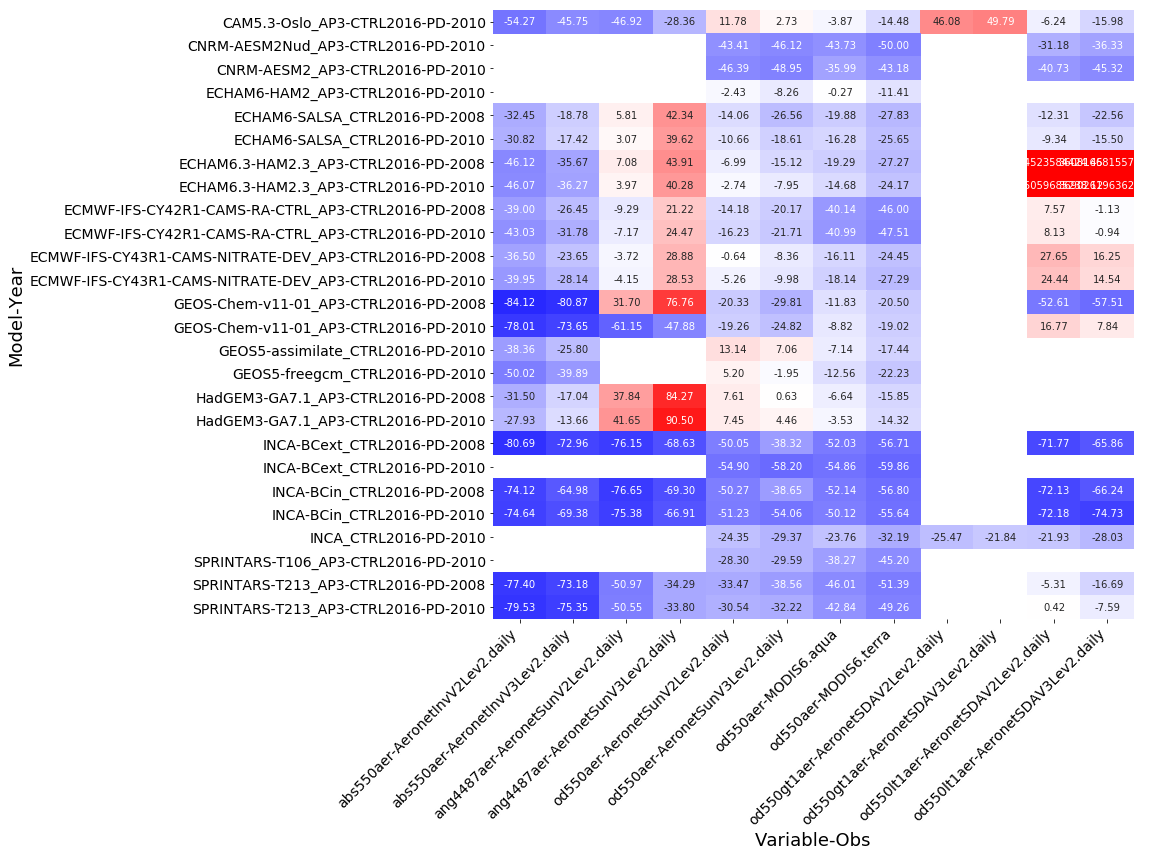

In [11]:
ax = pya.plot.heatmaps.df_to_heatmap(bias, 
                                     color_rowwise=False,
                                     figsize=(16, 12), vmin=-100, vmax=100)
ax.set_title('Bias')
display(Math(r'BIAS [\%] = 100 \cdot \frac{\sum_{i=1}^{N}M_i-O_i}{\sum_{i=1}^{N}O_i}'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

#### Fractional gross error (FGE)

In [16]:
fge = pd.pivot_table(monthly, values='FGE', columns=['Variable', 'Obs'],
                      index=['Model', 'Year'])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

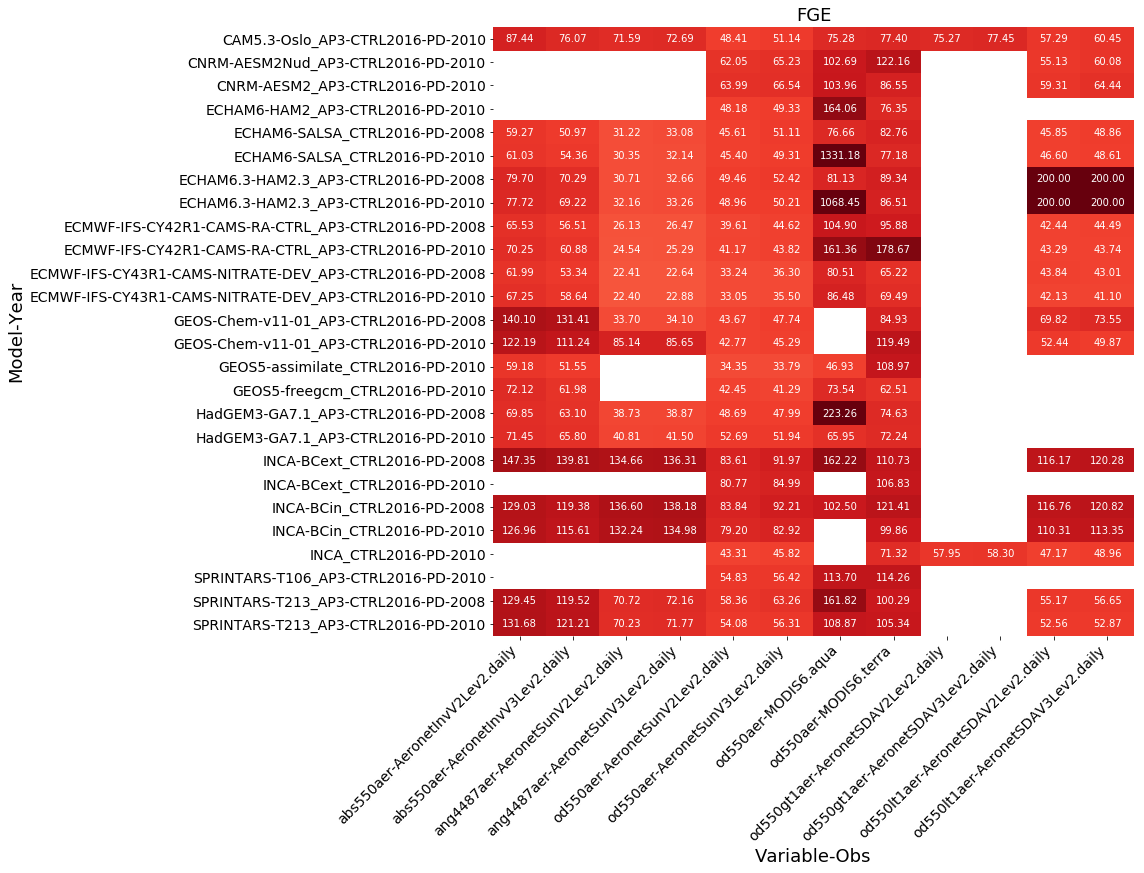

In [25]:
ax = pya.plot.heatmaps.df_to_heatmap(fge, 
                                     cmap='Reds',
                                     color_rowwise=False,
                                     figsize=(16, 12), vmax=200)
ax.set_title('FGE')
display(Math(r'FGE\,[\%] = \frac{2}{N}\sum_{i=1}^{N}\left|\frac{M_i-O_i}{M_i+O_i}\right|'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))